<a href="https://colab.research.google.com/github/Aras1703/Machine-Learning-Submission/blob/main/Heart_Disease_Classifier_using_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/heart_disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.target.value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

In [ ]:
X = df.drop(columns='target')
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((212, 13), (91, 13), (212,), (91,))

In [ ]:
X_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
227,35,1,0,120,198,0,1,130,1,1.6,1,0,3
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
140,51,0,2,120,295,0,0,157,0,0.6,2,0,2
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2


In [ ]:
preprocessor = ColumnTransformer([
            ('numeric', StandardScaler(), ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']),
            ('categoric', OneHotEncoder(), ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
])

In [ ]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
X_train

array([[-2.10652215, -0.6860489 , -0.875938  , ...,  0.        ,
         0.        ,  1.        ],
       [-1.88766271, -0.08380307,  0.08193726, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.30093174,  1.12068857,  0.56087489, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.30093174, -0.08380307, -0.17595223, ...,  0.        ,
         1.        ,  0.        ],
       [-1.66880326,  0.39799358, -0.47068308, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.73865062,  0.15709526, -0.21279359, ...,  0.        ,
         1.        ,  0.        ]])

In [ ]:
X_train.shape[1]

30

In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.SimpleRNN(16, input_shape = (X_train.shape[1],1)),
        tf.keras.layers.Dense(8, activation = 'relu'),
        tf.keras.layers.Dense(4, activation = 'relu'),
        tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr=0.0001),
              metrics = ['accuracy'])
history = model.fit(X_train, y_train, epochs = 500)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/500
7/7 [==============================] - 3s 45ms/step - loss: 0.7226 - accuracy: 0.3915
Epoch 2/500
7/7 [==============================] - 0s 45ms/step - loss: 0.7188 - accuracy: 0.3915
Epoch 3/500
7/7 [==============================] - 0s 50ms/step - loss: 0.7160 - accuracy: 0.5425
Epoch 4/500
7/7 [==============================] - 0s 55ms/step - loss: 0.7127 - accuracy: 0.5425
Epoch 5/500
7/7 [==============================] - 0s 43ms/step - loss: 0.7098 - accuracy: 0.5425
Epoch 6/500
7/7 [==============================] - 0s 54ms/step - loss: 0.7070 - accuracy: 0.5425
Epoch 7/500
7/7 [==============================] - 0s 48ms/step - loss: 0.7045 - accuracy: 0.5425
Epoch 8/500
7/7 [==============================] - 0s 44ms/step - loss: 0.7022 - accuracy: 0.5425
Epoch 9/500
7/7 [==============================] - 0s 46ms/step - loss: 0.7006 - accuracy: 0.5425
Epoch 10/500
7/7 [==============================] - 0s 44ms/step - loss: 0.6990 - accuracy: 0.5425
Epoch 11/500
7/7 [=

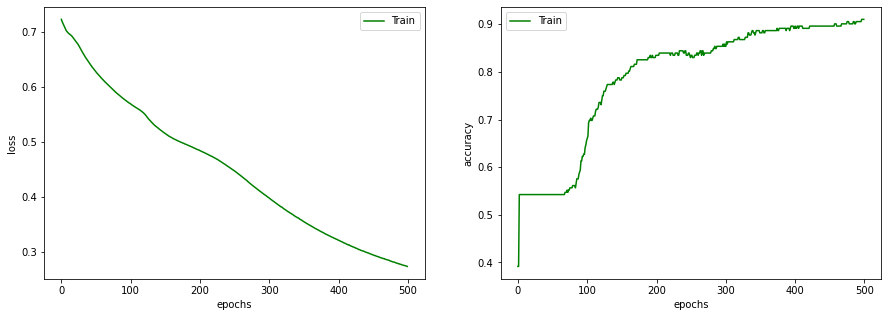

In [ ]:
plt.figure(figsize=(15,5))

plt.subplot(121)
plt.plot(history.history['loss'], 'g-', label='Train')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.subplot(122)
plt.plot(history.history['accuracy'], 'g-', label='Train')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
prediction = model.predict(X_test)
prediction.round()

array([[1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],